Importing the required LIBRARIES

In [160]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
#from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

Reading the Data


In [161]:
data =pd.read_csv("dataset.txt")
print(data.shape)
data.head()

(100, 3)


,A,B,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Define X and Y


In [162]:
X = np.asarray(data[['A','B']])
X[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [163]:
y = np.asarray(data['result'])
y[:5]

array([0, 0, 0, 1, 1], dtype=int64)

Training Testing Data


In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=4 )

Implementing Logistic Regression


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01,solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now Predicting the output of test data using the LR model

In [166]:
y_pred = LR.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [167]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [168]:
y_pred_proba = LR.predict_proba(X_test)
y_pred_proba = y_pred.astype('int')
y_pred_proba

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [169]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.6666666666666666

In [170]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[4 1]
 [1 4]]


Confusion matrix, without normalization
[[4 1]
 [1 4]]


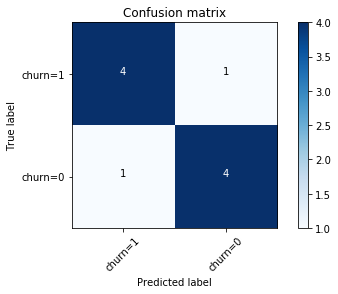

In [172]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [174]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [204]:
type(X_test)

numpy.ndarray

In [211]:
z= np.asarray([X[0]])

In [213]:
LR.predict(z)

array([0], dtype=int64)